In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt


In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-19-2020.csv")
data.tail(10)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
3950,NaN,NaN,Unknown,United Kingdom,2020-10-20 04:24:22,NaN,NaN,0,0,0,0.0,"Unknown, United Kingdom",NaN,NaN
3951,NaN,NaN,Wales,United Kingdom,2020-10-20 04:24:22,52.130700,-3.783700,36253,1712,0,34541.0,"Wales, United Kingdom",1155.069139,4.722368
3952,NaN,NaN,NaN,Uruguay,2020-10-20 04:24:22,-32.522800,-55.765800,2560,51,2121,388.0,Uruguay,73.696062,1.992188
3953,NaN,NaN,NaN,Uzbekistan,2020-10-20 04:24:22,41.377491,64.585262,63523,531,60604,2388.0,Uzbekistan,189.795400,0.835918
3954,NaN,NaN,NaN,Venezuela,2020-10-20 04:24:22,6.423800,-66.589700,86636,736,79694,6206.0,Venezuela,304.670747,0.849531
3955,NaN,NaN,NaN,Vietnam,2020-10-20 04:24:22,14.058324,108.277199,1140,35,1046,59.0,Vietnam,1.171170,3.070175
3956,NaN,NaN,NaN,West Bank and Gaza,2020-10-20 04:24:22,31.952200,35.233200,47616,413,40861,6342.0,West Bank and Gaza,933.387906,0.867356
3957,NaN,NaN,NaN,Yemen,2020-10-20 04:24:22,15.552727,48.516388,2056,597,1338,121.0,Yemen,6.893322,29.036965
3958,NaN,NaN,NaN,Zambia,2020-10-20 04:24:22,-13.133897,27.849332,15897,346,15031,520.0,Zambia,86.472139,2.176511
3959,NaN,NaN,NaN,Zimbabwe,2020-10-20 04:24:22,-19.015438,29.154857,8159,232,7683,244.0,Zimbabwe,54.894975,2.843486


In [3]:
#data=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-19-2020.csv")
#data.tail(10)
covid=pd.read_csv("https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv")
#updated_cases=pd.read_csv("https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv")
#updated_cases.head(10)
covid.tail()


,Date,Country,Confirmed,Recovered,Deaths
63407,2020-12-14,Zimbabwe,11358,9554,309
63408,2020-12-15,Zimbabwe,11522,9599,310
63409,2020-12-16,Zimbabwe,11749,9702,313
63410,2020-12-17,Zimbabwe,11866,9836,314
63411,2020-12-18,Zimbabwe,12047,9894,316


In [4]:
print("size/shape of the dataset",covid.shape)
print("checking for null values",covid.isnull().sum())
print("data type",covid.dtypes )

size/shape of the dataset (63412, 5)
checking for null values Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64
data type Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object


<h1> hide index here<h1>
#country_cases.style.hide_index()
#country_cases.head() 
#print(country_cases.to_string(index=False))

In [5]:
covid["Date"]= pd.to_datetime(covid["Date"],dayfirst=True)
covid["Date"]

0       2020-01-22
1       2020-01-23
2       2020-01-24
3       2020-01-25
4       2020-01-26
           ...    
63407   2020-12-14
63408   2020-12-15
63409   2020-12-16
63410   2020-12-17
63411   2020-12-18
Name: Date, Length: 63412, dtype: datetime64[ns]

In [6]:
#grouping diff types of cases as per date
datewise=covid.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

In [7]:
print("Basic information at this time",covid["Date"].iloc[-1])
print("total number of confirmed cases around the world",datewise["Confirmed"].iloc[-1])
print("total number of Recovered cases around the world",datewise["Recovered"].iloc[-1])
print("total number of Deaths cases around the world",datewise["Deaths"].iloc[-1])
print("total number of active cases",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("total number of closed cases",(datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1]))
#print(covid["Date"].iloc[-1])

Basic information at this time 2020-12-18 00:00:00
total number of confirmed cases around the world 75672814
total number of Recovered cases around the world 42667969
total number of Deaths cases around the world 1674840
total number of active cases 31330005
total number of closed cases 44342809


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

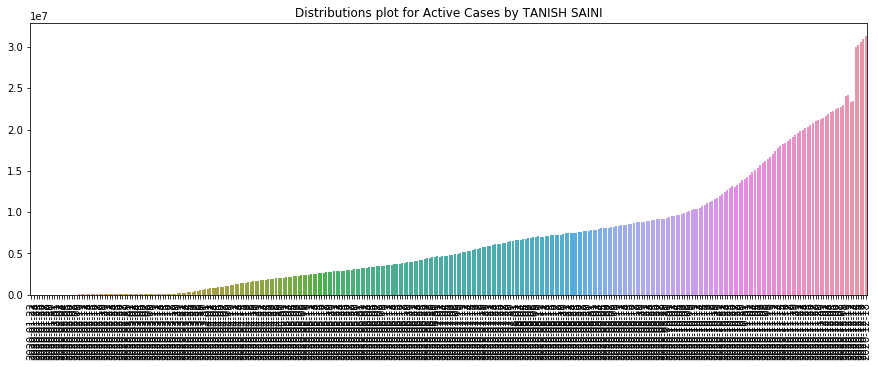

In [8]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distributions plot for Active Cases by TANISH SAINI")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

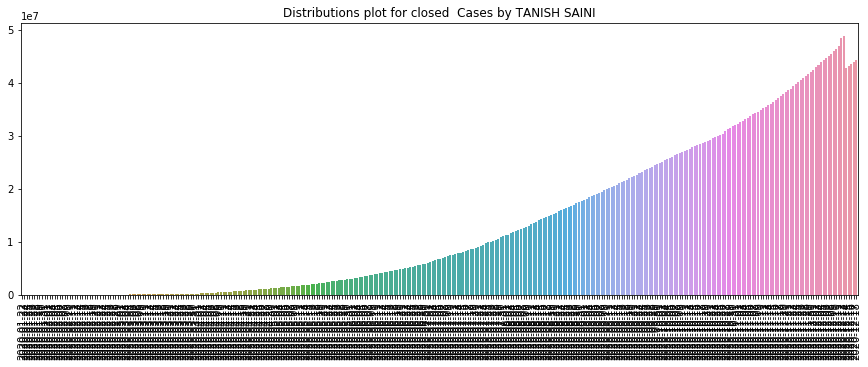

In [9]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Recovered"]+datewise["Deaths"])
plt.title("Distributions plot for closed  Cases by TANISH SAINI")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'weekly progress of different types of cases by TANISH SAINI ')

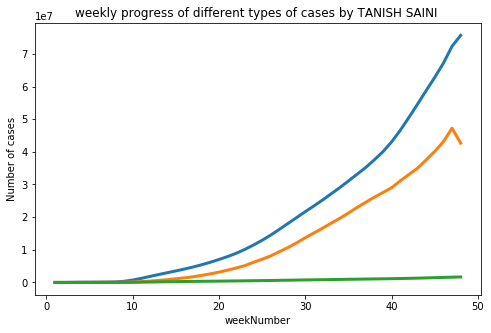

In [10]:
datewise["weekofyear"]=datewise.index.weekofyear
week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w = 1
for i in list(datewise["weekofyear"].unique()):
    weekwise_confirmed.append(datewise[datewise["weekofyear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["weekofyear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["weekofyear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=3)
plt.plot(week_num,weekwise_deaths,linewidth=3)
plt.xlabel("weekNumber")
plt.ylabel("Number of cases")
plt.title("weekly progress of different types of cases by TANISH SAINI ")

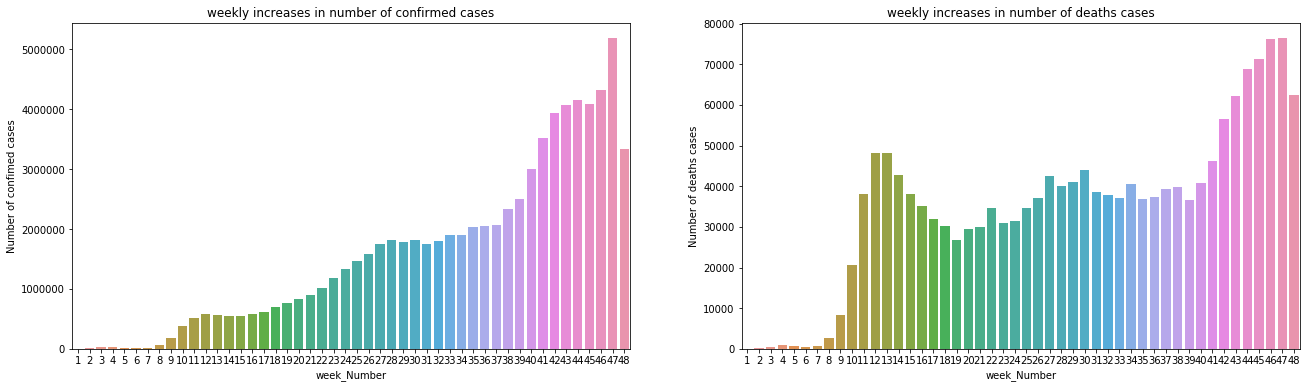

In [11]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(22,6))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
#sns.barplot(x=week_num,y=pd.series(weekwise_recovered).diff().fillna(0),ax=ax2)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("week_Number")
ax2.set_xlabel("week_Number")
ax1.set_ylabel("Number of confimed cases")
ax2.set_ylabel("Number of deaths cases")
ax1.set_title("weekly increases in number of confirmed cases")
ax2.set_title("weekly increases in number of deaths cases")
plt.show()

Average increases in number of confirmed cases everyday: 227928.0
Average increases in number of recovered cases everyday: 128518.0
Average increases in number of deaths cases everyday: 5045.0


C:\Users\tanish\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

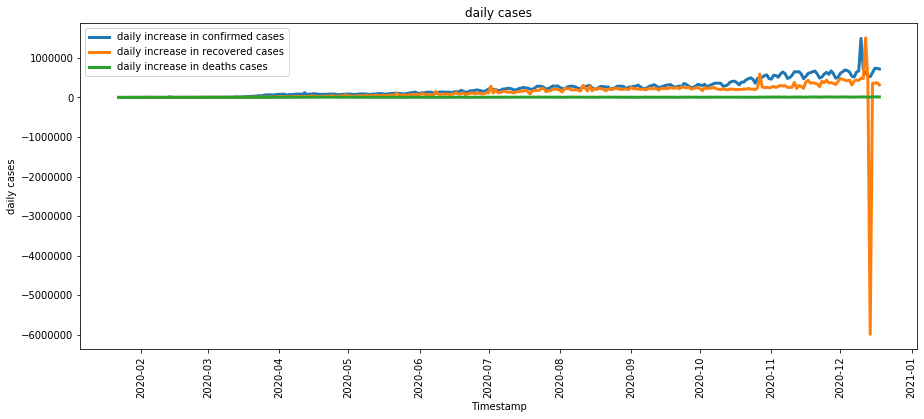

In [12]:
print("Average increases in number of confirmed cases everyday:",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increases in number of recovered cases everyday:",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increases in number of deaths cases everyday:",np.round(datewise["Deaths"].diff().fillna(0).mean()))


plt.figure(figsize=(15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="daily increase in confirmed cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="daily increase in recovered cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="daily increase in deaths cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("daily cases")
plt.title("daily cases")
plt.legend()
plt.xticks(rotation=90)
plt.show

In [13]:
#country wise analysis
#calculating country wise Mortality rate
countrywise=covid[covid["Date"]==covid["Date"].max()].groupby(["Country"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Recovered"])*100
countrywise["Recovered"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

Text(0.5, 1.0, 'top 15 coutries as per number of deaths cases')

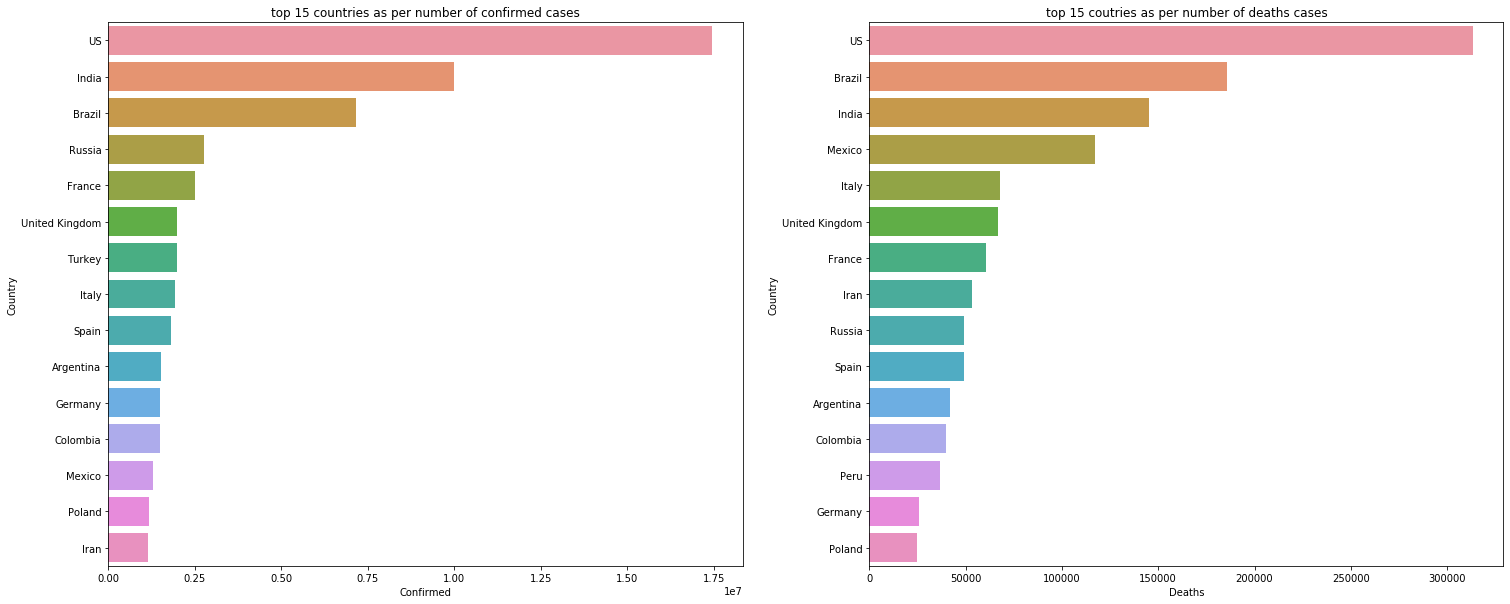

In [14]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))
top_15confirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15deaths=countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15confirmed["Confirmed"],y=top_15confirmed.index,ax=ax1)
ax1.set_title("top 15 countries as per number of confirmed cases")
sns.barplot(x=top_15deaths["Deaths"],y=top_15deaths.index,ax=ax2)
ax2.set_title("top 15 coutries as per number of deaths cases")

In [15]:
#data analysis for india
india_data=covid[covid["Country"]=="India"]
datewise_india = india_data.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_india.iloc[-1])
print("total number of Active acses",datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("total number of closed cases",datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])                                                   

Confirmed    10004599
Recovered     9550712
Deaths         145136
Name: 2020-12-18 00:00:00, dtype: int64
total number of Active acses 308751
total number of closed cases 9695848


<h1> weekly report of india <h1>

Text(0.5, 1.0, 'weekly progress of different types of cases by TANISH SAINI ')

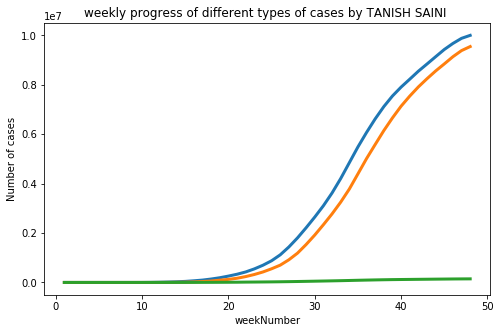

In [16]:
datewise_india["weekofyear"]=datewise_india.index.weekofyear
india_week_num=[]
india_weekwise_confirmed=[]
india_weekwise_recovered=[]
india_weekwise_deaths=[]
w = 1
for i in list(datewise["weekofyear"].unique()):
    india_weekwise_confirmed.append(datewise_india[datewise_india["weekofyear"]==i]["Confirmed"].iloc[-1])
    india_weekwise_recovered.append(datewise_india[datewise_india["weekofyear"]==i]["Recovered"].iloc[-1])
    india_weekwise_deaths.append(datewise_india[datewise_india["weekofyear"]==i]["Deaths"].iloc[-1])
    india_week_num.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(india_week_num,india_weekwise_confirmed,linewidth=3)
plt.plot(india_week_num,india_weekwise_recovered,linewidth=3)
plt.plot(india_week_num,india_weekwise_deaths,linewidth=3)
plt.xlabel("weekNumber")
plt.ylabel("Number of cases")
plt.title("weekly progress of different types of cases by TANISH SAINI ")

<h1>US Analysis with weekly report <h1>

In [17]:
#data analysis for US
US_data=covid[covid["Country"]=="US"]
datewise_US = US_data.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_US.iloc[-1])
print("total number of Active acses",datewise_US["Confirmed"].iloc[-1]-datewise_US["Recovered"].iloc[-1]-datewise_US["Deaths"].iloc[-1])
print("total number of closed cases",datewise_US["Recovered"].iloc[-1]+datewise_US["Deaths"].iloc[-1])

Confirmed    17459296
Recovered           0
Deaths         313588
Name: 2020-12-18 00:00:00, dtype: int64
total number of Active acses 17145708
total number of closed cases 313588


Text(0.5, 1.0, 'weekly progress of different types of cases by TANISH SAINI ')

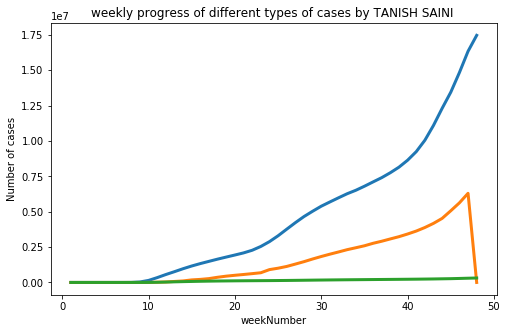

In [18]:
datewise_US["weekofyear"]=datewise_US.index.weekofyear
US_week_num=[]
US_weekwise_confirmed=[]
US_weekwise_recovered=[]
US_weekwise_deaths=[]
w = 1
for i in list(datewise["weekofyear"].unique()):
    US_weekwise_confirmed.append(datewise_US[datewise_US["weekofyear"]==i]["Confirmed"].iloc[-1])
    US_weekwise_recovered.append(datewise_US[datewise_US["weekofyear"]==i]["Recovered"].iloc[-1])
    US_weekwise_deaths.append(datewise_US[datewise_US["weekofyear"]==i]["Deaths"].iloc[-1])
    US_week_num.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(US_week_num,US_weekwise_confirmed,linewidth=3)
plt.plot(US_week_num,US_weekwise_recovered,linewidth=3)
plt.plot(US_week_num,US_weekwise_deaths,linewidth=3)
plt.xlabel("weekNumber")
plt.ylabel("Number of cases")
plt.title("weekly progress of different types of cases by TANISH SAINI ")

In [19]:
max_ind =datewise_india["Confirmed"].max()
china_data=covid[covid["Country"]=="China"]
Italy_data=covid[covid["Country"]=="Italy"]
US_data=covid[covid["Country"]=="US"]
spain_data=covid[covid["Country"]=="Spain"]
datewise_china=china_data.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Italy=Italy_data.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_US=US_data.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_spain=spain_data.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print("it took ",datewise_india[datewise_india["Confirmed"]>0].shape[0],"days in india to reach",max_ind,"Confirmed cases")
#print("it took ",datewise_china[(datewise_china["Confirmed"]>0)&(datewise_china["Confirmed"]<=max_ind)].shape[0],"days in china to reach Confirmed cases")
#print("it took ",datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)].shape[0],"days in italy to reachConfirmed cases")
print("it took ",datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)].shape[0],"days in US to reachConfirmed cases")
#print("it took ",datewise_spain[(datewise_spain["Confirmed"]>0)&(datewise_spain["Confirmed"]<=max_ind)].shape[0],"days in spain to reach Confirmed cases")

it took  324 days in india to reach 10004599 Confirmed cases
it took  291 days in US to reachConfirmed cases


<h1> model implementation for prediction <h1>

In [20]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"] = datewise["Days Since"].dt.days
train_ml = datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml = datewise.iloc[:int(datewise.shape[0]*0.95):]
model_scores=[]



<h1> linear regression <h1>

In [21]:
lin_reg = LinearRegression(normalize=True)
#svm = SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))
#svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [23]:
prediction_valid_lin_reg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
#prediction_valid_svm=svm.predict(np.array(valid_ml["Days since"]).reshape(-1,1))


In [47]:
new_date =[]
new_prediction_lr=[]
#new_prediction_svm=[]
for i in range(1,20):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    #new_prediction_svm.append(svm.predict(np.array(datewise["Days since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x: '%.f'  % x)
model_predictions= pd.DataFrame(zip(new_date,new_prediction_lr),columns=["Dates","LR"])
model_predictions.head(20)                               

,Dates,LR
0,2020-12-19,49647757
1,2020-12-20,49833437
2,2020-12-21,50019118
3,2020-12-22,50204798
4,2020-12-23,50390479
5,2020-12-24,50576159
6,2020-12-25,50761840
7,2020-12-26,50947520
8,2020-12-27,51133201
9,2020-12-28,51318881


In [54]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.90)]
valid=datewise.iloc[int(datewise.shape[0]*0.90):]


In [55]:
holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=1.1,smoothing_slope=0.2)
y_pred=valid.copy()
y_pred["Holt"]=holt.forecast(len(valid))

In [57]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,20):
    holt_new_date.append(datewise.index[-1]+timedelta(days=1))
    holt_new_prediction.append(holt.forecast((len(valid)+1))[-1])
model_predictions["holts linear model prediction"]=holt_new_prediction
model_predictions.head(15)

,Dates,LR,holts linear model prediction
0,2020-12-19,49647757,74848817
1,2020-12-20,49833437,74848817
2,2020-12-21,50019118,74848817
3,2020-12-22,50204798,74848817
4,2020-12-23,50390479,74848817
5,2020-12-24,50576159,74848817
6,2020-12-25,50761840,74848817
7,2020-12-26,50947520,74848817
8,2020-12-27,51133201,74848817
9,2020-12-28,51318881,74848817
